In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score,roc_curve, roc_auc_score)

In [2]:
data=pd.read_csv(r"D:\Users\DELL\Downloads\leukemia.csv")

In [3]:
data.head()

,WBC_Count,Platelet_Count,Blast_Percentage,Hemoglobin,Age,Diagnosis
0,12000,200000,30,12.5,35,Leukemia
1,8000,180000,5,13.2,40,Healthy
2,15000,250000,45,11.8,28,Leukemia
3,9000,210000,3,14.0,50,Healthy
4,16000,230000,50,10.5,22,Leukemia


In [5]:
data.isnull().sum()

WBC_Count           0
Platelet_Count      0
Blast_Percentage    0
Hemoglobin          0
Age                 0
Diagnosis           0
dtype: int64

In [6]:
data.describe()

,WBC_Count,Platelet_Count,Blast_Percentage,Hemoglobin,Age
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,11550.000000,212500.000000,24.100000,12.320000,35.300000
std,3744.996662,31024.184115,21.971952,1.432015,10.551988
min,7000.000000,170000.000000,2.000000,10.000000,19.000000
25%,8250.000000,188750.000000,4.250000,11.200000,28.500000
50%,11000.000000,205000.000000,18.500000,12.650000,36.000000
75%,14750.000000,237500.000000,43.750000,13.425000,43.000000
max,17000.000000,260000.000000,55.000000,14.000000,50.000000


In [7]:
print(data,5)

   WBC_Count  Platelet_Count  Blast_Percentage  Hemoglobin  Age Diagnosis
0      12000          200000                30        12.5   35  Leukemia
1       8000          180000                 5        13.2   40   Healthy
2      15000          250000                45        11.8   28  Leukemia
3       9000          210000                 3        14.0   50   Healthy
4      16000          230000                50        10.5   22  Leukemia
5       7000          170000                 2        13.5   48   Healthy
6      14000          240000                40        11.0   30  Leukemia
7      10000          200000                 7        12.8   37   Healthy
8      17000          260000                55        10.0   19  Leukemia
9       7500          185000                 4        13.9   44   Healthy 5


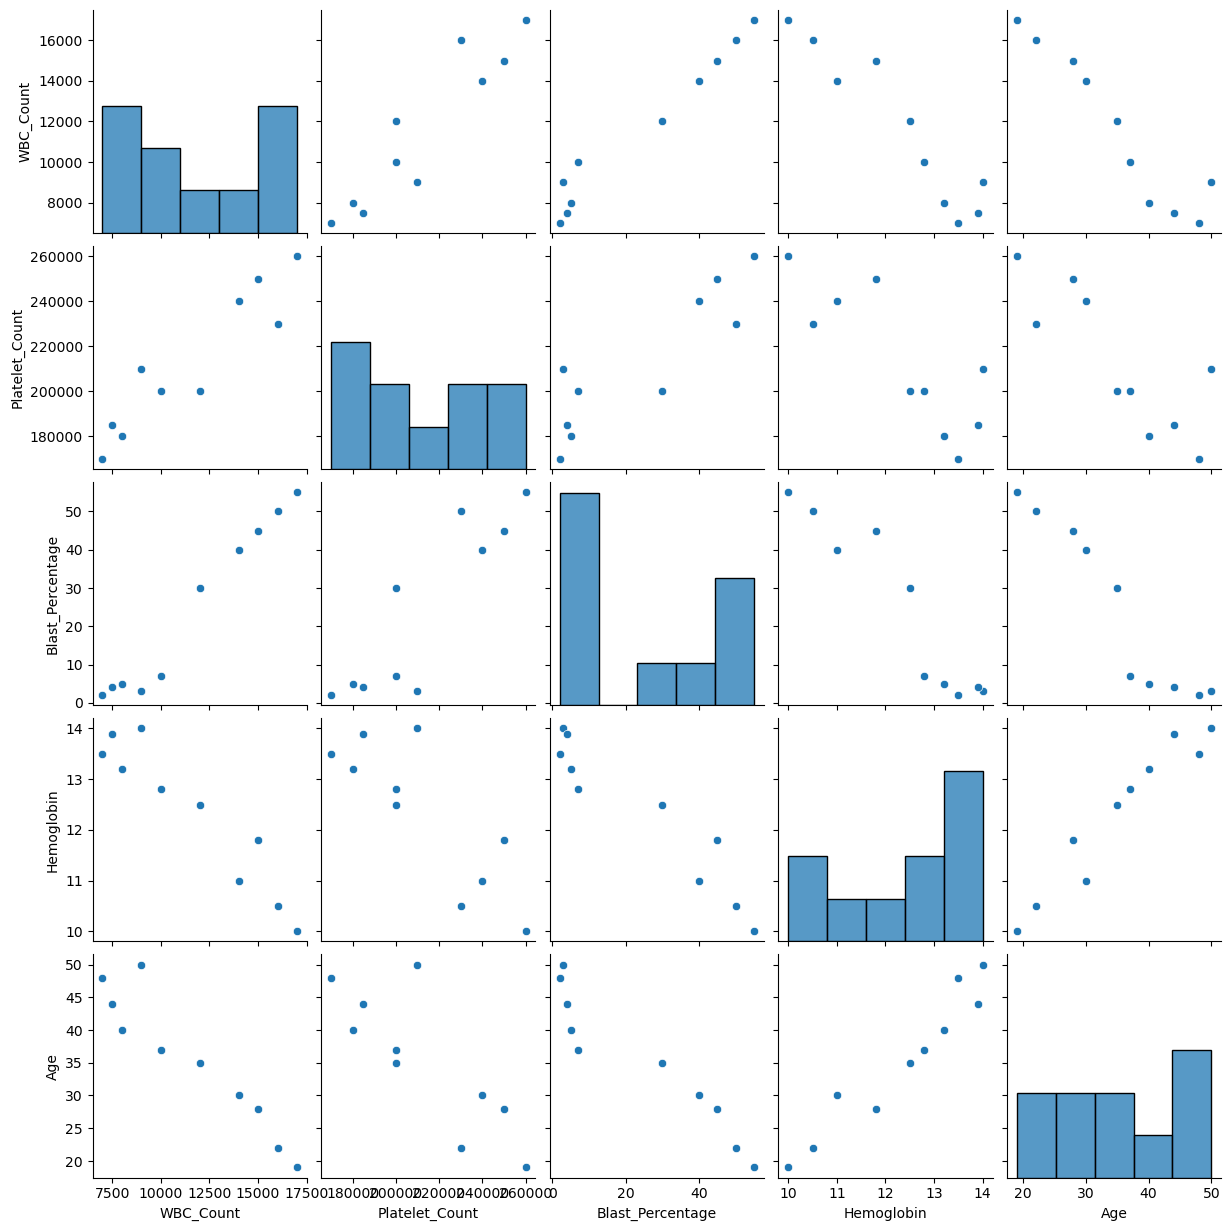

In [8]:
import seaborn as sns
sns.pairplot(data)

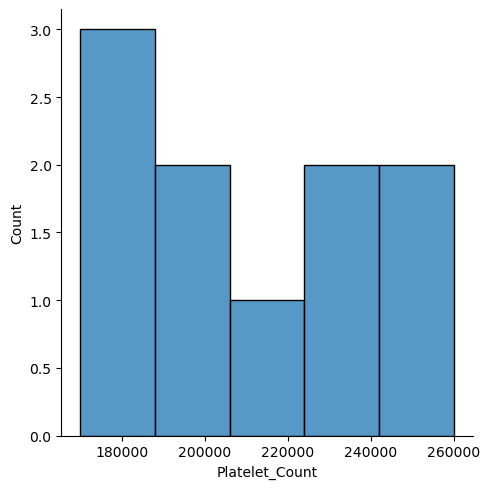

In [12]:
sns.displot(data['Platelet_Count'])

In [13]:
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])

X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [15]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("\nEvaluation Metrics")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1-score : {f1_score(y_test, y_pred):.3f}")


Evaluation Metrics
Confusion Matrix:
 [[1 1]
 [0 1]]
Precision: 0.500
Recall   : 1.000
F1-score : 0.667


In [16]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC  : {roc_auc:.3f}")

ROC AUC  : 0.750


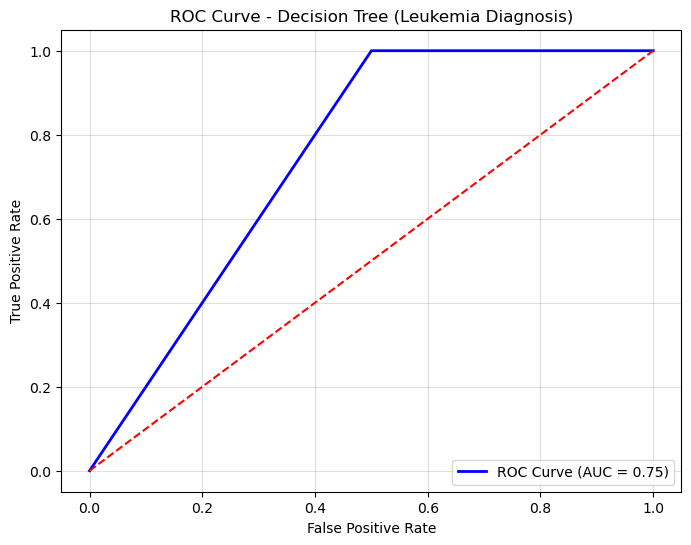

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Leukemia Diagnosis)')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()

In [18]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='f1')

print("\n K-Fold Cross-Validation")
print(f"F1 scores: {cv_scores}")
print(f"Mean F1 Score  : {cv_scores.mean():.3f}")


 K-Fold Cross-Validation
F1 scores: [1.         0.         0.66666667 1.         1.        ]
Mean F1 Score  : 0.733
